In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['crime.csv']


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
os.chdir("../input")
os.listdir()

['crime.csv']

In [4]:
df = pd.read_csv("../input/crime.csv",  encoding = "ISO-8859-1")

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.shape
df.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"
5,I182080049,1402,Vandalism,VANDALISM,C11,351,NaN,2018-10-02 20:40:00,2018,10,Tuesday,20,Part Two,DORCHESTER AVE,42.299197,-71.060470,"(42.29919694, -71.06046974)"
6,I182080048,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,NaN,,NaN,2018-10-03 20:16:00,2018,10,Wednesday,20,Part Three,NaN,42.320734,-71.056764,"(42.32073413, -71.05676415)"
7,I182080047,3301,Verbal Disputes,VERBAL DISPUTE,B2,603,NaN,2018-10-03 19:32:00,2018,10,Wednesday,19,Part Three,TREMONT ST,42.333807,-71.103778,"(42.33380683, -71.10377843)"
8,I182080045,802,Simple Assault,ASSAULT SIMPLE - BATTERY,E18,543,NaN,2018-10-03 19:27:51,2018,10,Wednesday,19,Part Two,AVILA RD,42.256145,-71.128025,"(42.25614494, -71.12802506)"
9,I182080044,3410,Towed,TOWED MOTOR VEHICLE,D4,621,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part Three,COMMONWEALTH AVE,42.348866,-71.089363,"(42.34886600, -71.08936284)"


In [6]:
df.columns.values

array(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR',
       'UCR_PART', 'STREET', 'Lat', 'Long', 'Location'], dtype=object)

In [7]:
df.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

In [8]:
# Top 10 crime reported streets

streets = df.groupby([df['STREET'].fillna('NO STREET NAME')])['REPORTING_AREA'].aggregate(np.size).reset_index().sort_values('REPORTING_AREA',ascending = False).head(10)
streets

,STREET,REPORTING_AREA
4417,WASHINGTON ST,14590
3109,NO STREET NAME,10977
497,BLUE HILL AVE,8002
560,BOYLSTON ST,7425
1315,DORCHESTER AVE,5297
4212,TREMONT ST,4925
2759,MASSACHUSETTS AVE,4865
2023,HARRISON AVE,4739
821,CENTRE ST,4487
1023,COMMONWEALTH AVE,4291


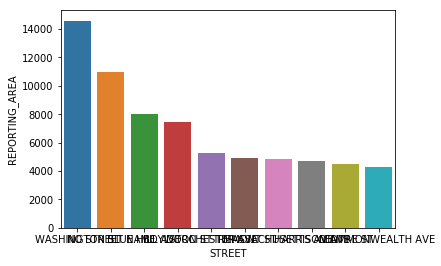

In [9]:
sns.barplot(x="STREET", y="REPORTING_AREA", data = streets)

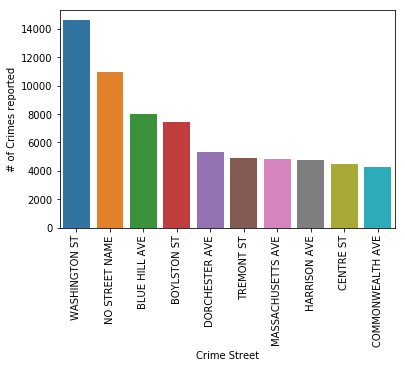

In [10]:
ax = sns.barplot(x="STREET", y="REPORTING_AREA", data = streets)
ax.set(xlabel='Crime Street', ylabel='# of Crimes reported')
ax.set_xticklabels(streets['STREET'],rotation=90)

plt.show()

In [34]:
# Top 10 Offense types

streets = df.groupby([df['OFFENSE_CODE_GROUP']])['STREET'].aggregate(np.size).reset_index().sort_values('STREET', ascending = False).head(10)
streets

,OFFENSE_CODE_GROUP,STREET
43,Motor Vehicle Accident Response,38134
34,Larceny,26670
40,Medical Assistance,24226
31,Investigate Person,19176
46,Other,18612
15,Drug Violation,17037
61,Simple Assault,16263
63,Vandalism,15810
64,Verbal Disputes,13478
62,Towed,11632


In [23]:
# Year wise percentage rate
yrlbl = df['YEAR'].astype('category').cat.categories.tolist()
yrlbl

[2015, 2016, 2017, 2018]

In [24]:
yrwisecount = df['YEAR'].value_counts()
yrwisecount


2017    100938
2016     99134
2018     74356
2015     53392
Name: YEAR, dtype: int64

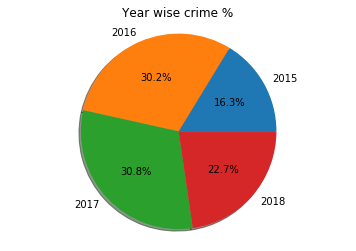

In [33]:
sizes = [yrwisecount[year] for year in yrlbl]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=yrlbl,  autopct='%1.1f%%',shadow=True) 
ax1.axis('equal')
ax1.set_title("Year wise crime %")
plt.show()

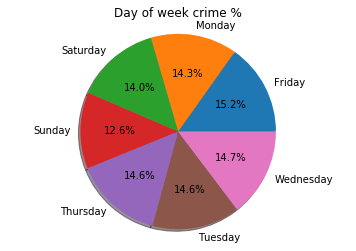

In [38]:
# Day of the week crime %
dayofwkcount = df['DAY_OF_WEEK'].value_counts()
dayofwkcount

dayofwk = df['DAY_OF_WEEK'].astype('category').cat.categories.tolist()
dayofwk

sizes = [dayofwkcount[dow] for dow in dayofwk]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=dayofwk,  autopct='%1.1f%%',shadow=True) 
ax1.axis('equal')
ax1.set_title("Day of week crime %")
plt.show()

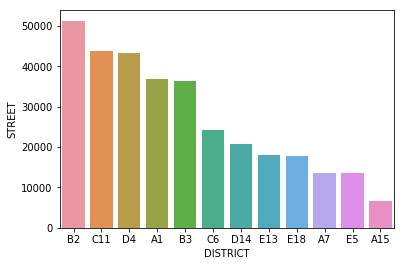

In [48]:
# Count of crimes - reporting district wise

crimedistrict = df.groupby([df['DISTRICT']])['STREET'].aggregate(np.size).reset_index().sort_values('STREET',ascending = False)

sns.barplot(x="DISTRICT", y="STREET", data = crimedistrict)